In [20]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler # Z-score variables
from sklearn.preprocessing import MinMaxScaler # Min-Max Normalization

from sklearn.model_selection import train_test_split # simple TT split cv

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

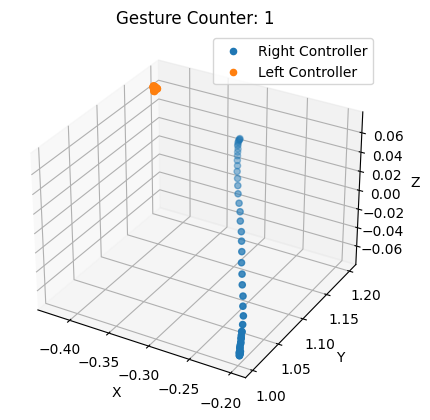

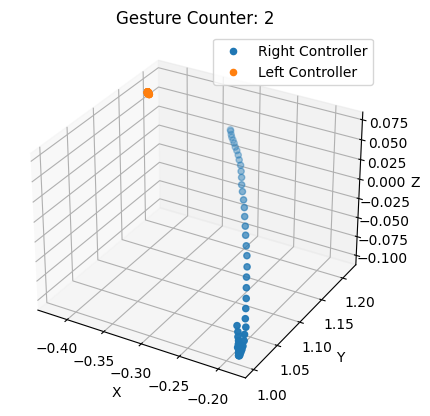

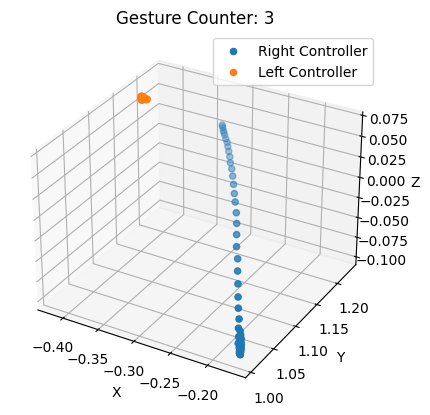

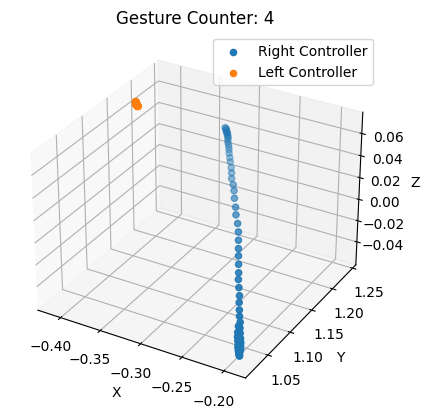

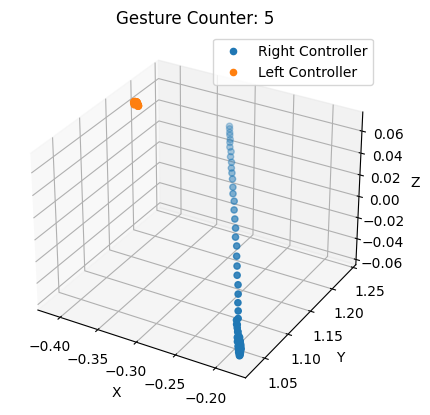

In [21]:
# importing sub 2 pan box select 
sub_1_1_pan_right_DF = pd.read_csv("/Users/iman/CPSC_Courses/CPSC392ParlettPelleriti/Research/Data/Sub2/Instructional/session_I_BoxSelect_subjID_2_04-14-23_03-56-33.csv")
sub_1_1_pan_right_DF.drop(sub_1_1_pan_right_DF[(sub_1_1_pan_right_DF['trigger_pull_amount_left'] == 0) & (sub_1_1_pan_right_DF['trigger_pull_amount_right'] == 0)].index, inplace=True)

grouped_by_gesture = sub_1_1_pan_right_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Gesture Counter: {gesture_counter}')
    ax.legend()
    plt.show()

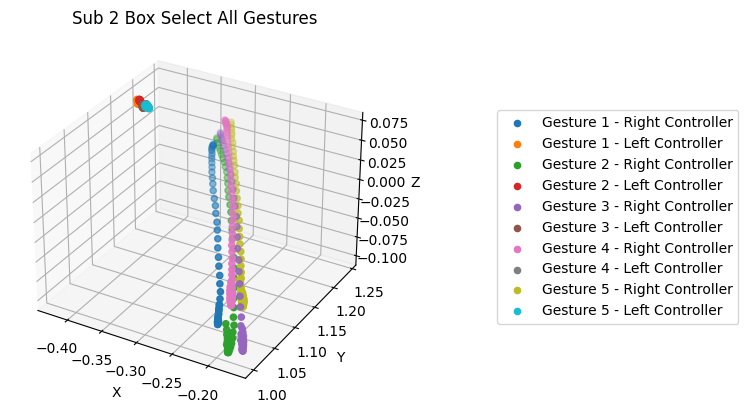

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_gesture = sub_1_1_pan_right_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Gesture {gesture_counter} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Gesture {gesture_counter} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sub 2 Box Select All Gestures')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()

In [23]:
# only counter variables in dataframe
counter = ["time", "absolute_time", "left_handed", "right_handed", "trigger_pull_amount_left", "trigger_pull_amount_right", "gesture_counter_UI", "x_pressed", "x_counter", "gesture_counter"]
sub_1_1_pan_right_DF_counter = sub_1_1_pan_right_DF[counter]
sub_1_1_pan_right_DF_counter.head()

,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter
173,113.924225,15:56:35:982,0,1,0,0.238,1,False,0,1
174,113.938019,15:56:35:996,0,1,0,0.583,1,False,0,1
175,113.951836,15:56:36:10,0,1,0,0.882,1,False,0,1
176,113.965874,15:56:36:24,0,1,0,1.000,1,False,0,1
177,113.979774,15:56:36:37,0,1,0,1.000,1,False,0,1


In [24]:
sub_1_1_pan_right_DF_counter.shape

(258, 10)

In [25]:
# only translation variables in dataframe
translation = ["r_controller_translation_x", "r_controller_translation_y", "r_controller_translation_z", "l_controller_translation_x", "l_controller_translation_y", "l_controller_translation_z"]
sub_1_1_pan_right_DF_translation = sub_1_1_pan_right_DF[translation]
sub_1_1_pan_right_DF_translation.head()

,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
173,-0.325,1.200,0.029,-0.424,1.18,0.067
174,-0.325,1.199,0.029,-0.424,1.18,0.066
175,-0.324,1.198,0.029,-0.424,1.18,0.066
176,-0.324,1.197,0.029,-0.424,1.18,0.066
177,-0.324,1.196,0.029,-0.424,1.18,0.066


In [26]:
# normalization
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(sub_1_1_pan_right_DF_translation), columns=sub_1_1_pan_right_DF_translation.columns)
df_normalized.head()

,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0.054217,0.827160,0.921429,0.052632,0.4,0.5
1,0.054217,0.823045,0.921429,0.052632,0.4,0.4
2,0.060241,0.818930,0.921429,0.052632,0.4,0.4
3,0.060241,0.814815,0.921429,0.052632,0.4,0.4
4,0.060241,0.810700,0.921429,0.052632,0.4,0.4


In [27]:
df_normalized.shape

(258, 6)

In [28]:
sub_1_1_pan_right_DF_counter.insert(0, 'index', range(0, 0 + len(sub_1_1_pan_right_DF_counter)))
sub_1_1_pan_right_DF_counter.head()

,index,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter
173,0,113.924225,15:56:35:982,0,1,0,0.238,1,False,0,1
174,1,113.938019,15:56:35:996,0,1,0,0.583,1,False,0,1
175,2,113.951836,15:56:36:10,0,1,0,0.882,1,False,0,1
176,3,113.965874,15:56:36:24,0,1,0,1.000,1,False,0,1
177,4,113.979774,15:56:36:37,0,1,0,1.000,1,False,0,1


In [29]:
df_normalized.insert(0, 'index', range(0, 0 + len(df_normalized)))
df_normalized.head()

,index,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,0.054217,0.827160,0.921429,0.052632,0.4,0.5
1,1,0.054217,0.823045,0.921429,0.052632,0.4,0.4
2,2,0.060241,0.818930,0.921429,0.052632,0.4,0.4
3,3,0.060241,0.814815,0.921429,0.052632,0.4,0.4
4,4,0.060241,0.810700,0.921429,0.052632,0.4,0.4


In [30]:
merged_sub_z_1_1_pan_right_DF = pd.merge(left=sub_1_1_pan_right_DF_counter, right=df_normalized, left_on='index', right_on='index')
merged_sub_z_1_1_pan_right_DF.head()

,index,time,absolute_time,left_handed,right_handed,trigger_pull_amount_left,trigger_pull_amount_right,gesture_counter_UI,x_pressed,x_counter,gesture_counter,r_controller_translation_x,r_controller_translation_y,r_controller_translation_z,l_controller_translation_x,l_controller_translation_y,l_controller_translation_z
0,0,113.924225,15:56:35:982,0,1,0,0.238,1,False,0,1,0.054217,0.827160,0.921429,0.052632,0.4,0.5
1,1,113.938019,15:56:35:996,0,1,0,0.583,1,False,0,1,0.054217,0.823045,0.921429,0.052632,0.4,0.4
2,2,113.951836,15:56:36:10,0,1,0,0.882,1,False,0,1,0.060241,0.818930,0.921429,0.052632,0.4,0.4
3,3,113.965874,15:56:36:24,0,1,0,1.000,1,False,0,1,0.060241,0.814815,0.921429,0.052632,0.4,0.4
4,4,113.979774,15:56:36:37,0,1,0,1.000,1,False,0,1,0.060241,0.810700,0.921429,0.052632,0.4,0.4


In [31]:
merged_sub_z_1_1_pan_right_DF.shape

(258, 17)

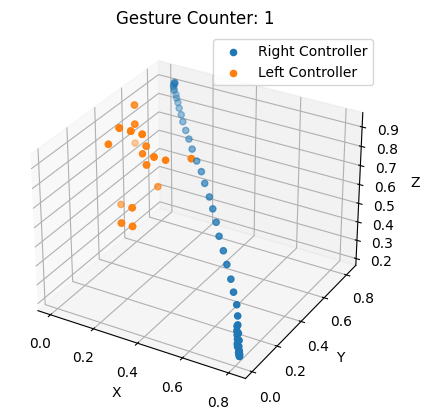

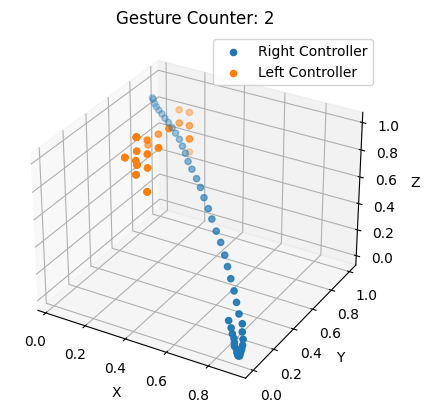

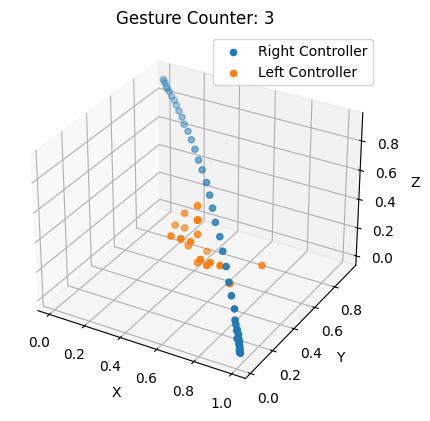

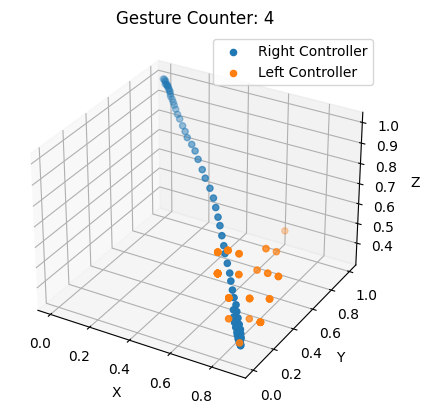

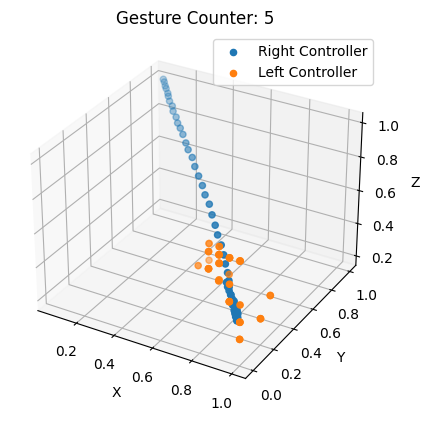

In [32]:
grouped_by_gesture = merged_sub_z_1_1_pan_right_DF.groupby('gesture_counter')
print(grouped_by_gesture)

for gesture_counter, group in grouped_by_gesture:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label='Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label='Left Controller')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Gesture Counter: {gesture_counter}')
    ax.legend()
    plt.show()

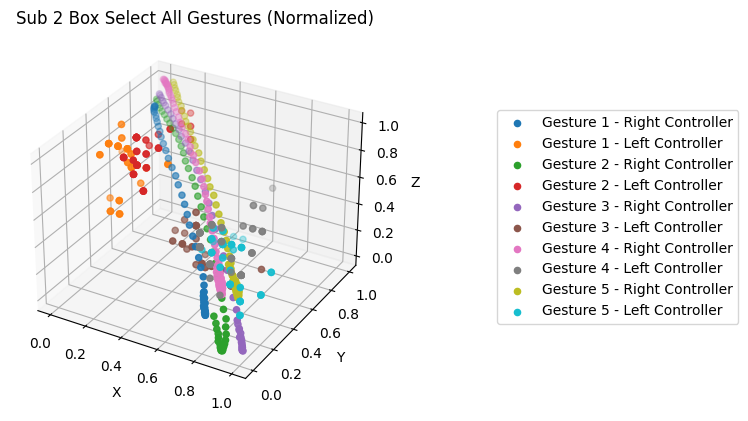

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_by_gesture = merged_sub_z_1_1_pan_right_DF.groupby('gesture_counter')

for gesture_counter, group in grouped_by_gesture:
    ax.scatter(group['r_controller_translation_x'], group['r_controller_translation_y'], group['r_controller_translation_z'], label=f'Gesture {gesture_counter} - Right Controller')
    ax.scatter(group['l_controller_translation_x'], group['l_controller_translation_y'], group['l_controller_translation_z'], label=f'Gesture {gesture_counter} - Left Controller')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sub 2 Box Select All Gestures (Normalized)')
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()